Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.impute import SimpleImputer


Load Dataset

In [2]:
# Load dataset
data = pd.read_csv('/content/covid_iver_cancer.csv', encoding='latin-1')
print(data.head())

  Cancer         Year  Month Bleed Mode_Presentation  Age Gender Etiology  \
0      Y  Prepandemic      1     N      Surveillance   68      M    NAFLD   
1      Y  Prepandemic      1     N      Surveillance   70      M     ARLD   
2      Y  Prepandemic      1     N      Surveillance   64      M     ARLD   
3      Y  Prepandemic      1     N        Incidental   73      M     ARLD   
4      Y  Prepandemic      1     N        Incidental   66      F     ARLD   

  Cirrhosis  Size  ... Surveillance_programme Surveillance_effectiveness  \
0         Y  22.0  ...                      Y                 Consistent   
1         Y  40.0  ...                      Y                 Consistent   
2         Y  52.0  ...                      Y                 Consistent   
3         Y  80.0  ...                      N                        NaN   
4         Y  60.0  ...                      N                        NaN   

  Mode_of_surveillance_detection Time_diagnosis_1st_Tx  \
0                     

In [3]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Cancer', 'Year', 'Bleed', 'Mode_Presentation', 'Gender', 'Etiology',
       'Cirrhosis', 'HCC_TNM_Stage', 'HCC_BCLC_Stage', 'ICC_TNM_Stage',
       'Treatment_grps', 'Alive_Dead', 'Type_of_incidental_finding',
       'Surveillance_programme', 'Surveillance_effectiveness',
       'Mode_of_surveillance_detection', 'Date_incident_surveillance_scan',
       'Prev_known_cirrhosis'],
      dtype='object')


In [4]:
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Verify the transformation
print(data.head())

   Cancer  Year  Month  Bleed  Mode_Presentation  Age  Gender  Etiology  \
0       1     1      1      0                  1   68       1         4   
1       1     1      1      0                  1   70       1         0   
2       1     1      1      0                  1   64       1         0   
3       1     1      1      0                  0   73       1         0   
4       1     1      1      0                  0   66       0         0   

   Cirrhosis  Size  ...  Surveillance_programme  Surveillance_effectiveness  \
0          1  22.0  ...                       1                           0   
1          1  40.0  ...                       1                           0   
2          1  52.0  ...                       1                           0   
3          1  80.0  ...                       0                           3   
4          1  60.0  ...                       0                           3   

   Mode_of_surveillance_detection  Time_diagnosis_1st_Tx  \
0             

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cancer                              450 non-null    int64  
 1   Year                                450 non-null    int64  
 2   Month                               450 non-null    int64  
 3   Bleed                               450 non-null    int64  
 4   Mode_Presentation                   450 non-null    int64  
 5   Age                                 450 non-null    int64  
 6   Gender                              450 non-null    int64  
 7   Etiology                            450 non-null    int64  
 8   Cirrhosis                           450 non-null    int64  
 9   Size                                400 non-null    float64
 10  HCC_TNM_Stage                       450 non-null    int64  
 11  HCC_BCLC_Stage                      450 non-n

In [6]:
data.Etiology.value_counts()


Etiology
8    139
4    120
0     95
5     38
2     24
3     15
7     12
1      5
6      2
Name: count, dtype: int64

In [7]:
# Data Preprocessing
# Handling missing values
data.fillna(method='ffill', inplace=True)


In [8]:
data

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
0,1,1,1,0,1,68,1,4,1,22.0,...,1,0,2,0.47,2,0.0,0.70,NaN,1,7.333333
1,1,1,1,0,1,70,1,0,1,40.0,...,1,0,2,0.47,2,2.0,0.70,NaN,1,4.033333
2,1,1,1,0,1,64,1,0,1,52.0,...,1,0,2,0.47,2,0.0,0.70,NaN,1,5.900000
3,1,1,1,0,0,73,1,0,1,80.0,...,0,3,3,0.47,2,2.0,0.70,NaN,1,5.900000
4,1,1,1,0,0,66,0,0,1,60.0,...,0,3,3,0.47,2,0.0,0.70,NaN,1,5.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,12,2,2,72,0,8,2,20.0,...,2,3,3,1.37,2,1.0,0.70,0.70,1,9.766667
446,0,0,12,2,2,63,1,8,2,75.0,...,2,3,3,2.93,2,0.0,1.63,1.63,1,9.766667
447,0,0,12,2,2,79,0,8,2,63.0,...,2,3,3,2.93,2,1.0,1.63,1.63,1,9.766667
448,0,0,12,2,2,84,0,8,2,65.0,...,2,3,3,2.93,2,2.0,1.63,1.63,1,9.766667


In [9]:
# Splitting data into features and target variable
X = data.drop('Alive_Dead', axis=1)
y = data['Alive_Dead']
#print(X)

In [10]:
#print(y)

In [11]:
#data.info()


In [12]:
print(X.shape)
#print(y.shape)

(450, 26)


In [13]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

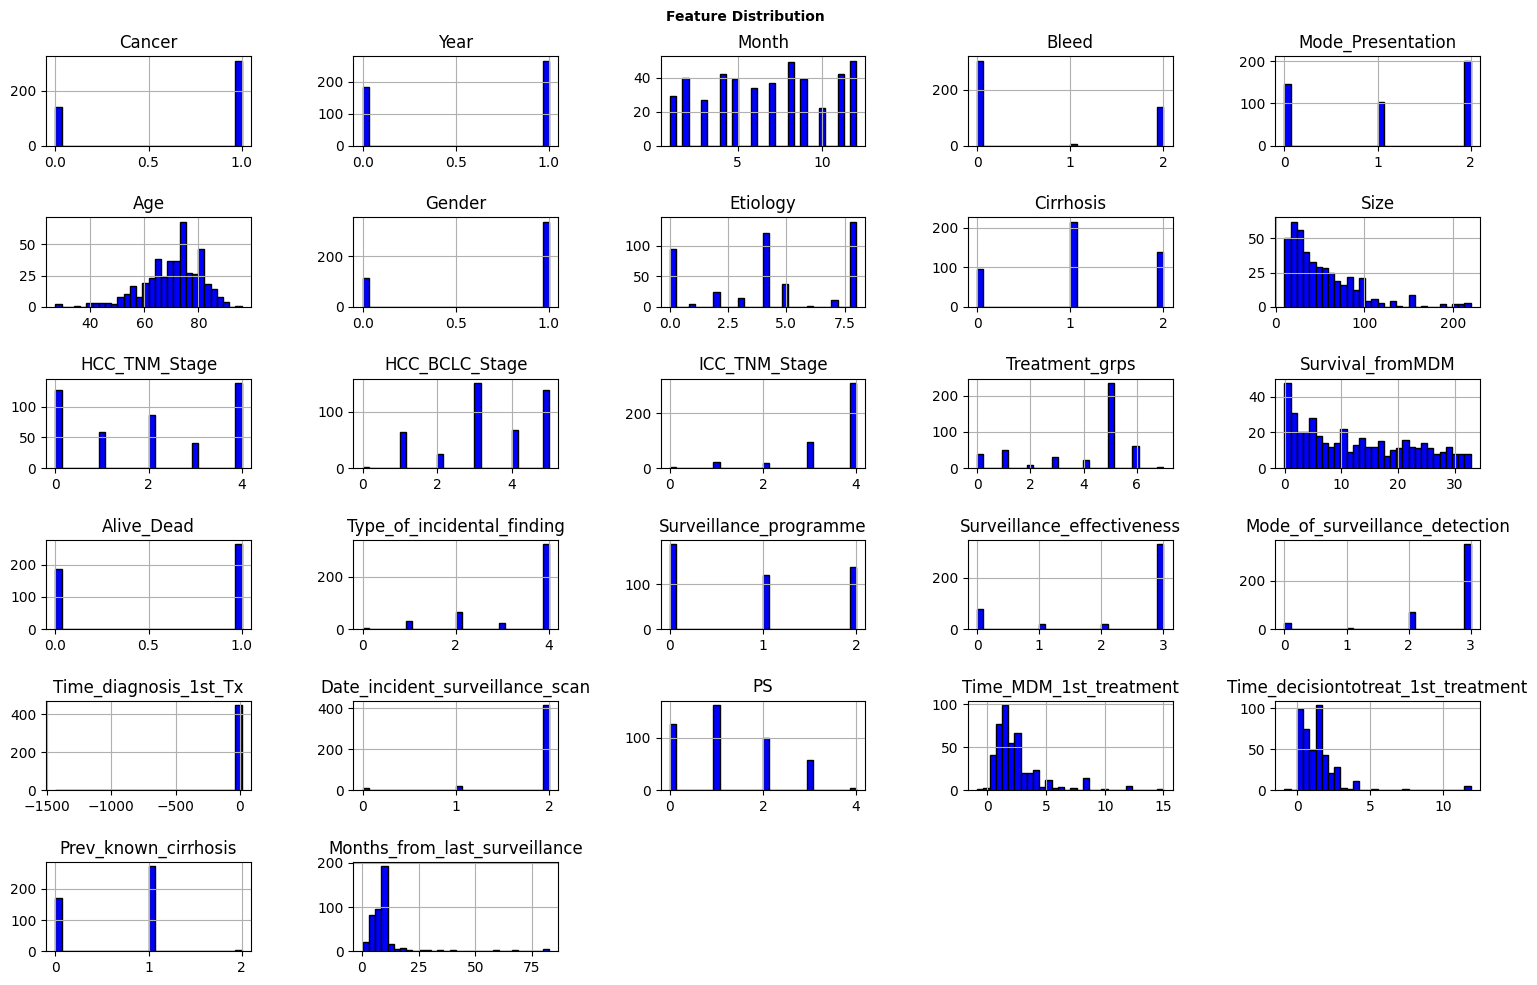

In [14]:
# Plot histograms for numerical features
data.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Feature Distribution', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(hspace=0.8, wspace=0.5)  # Adjust spacing between plots

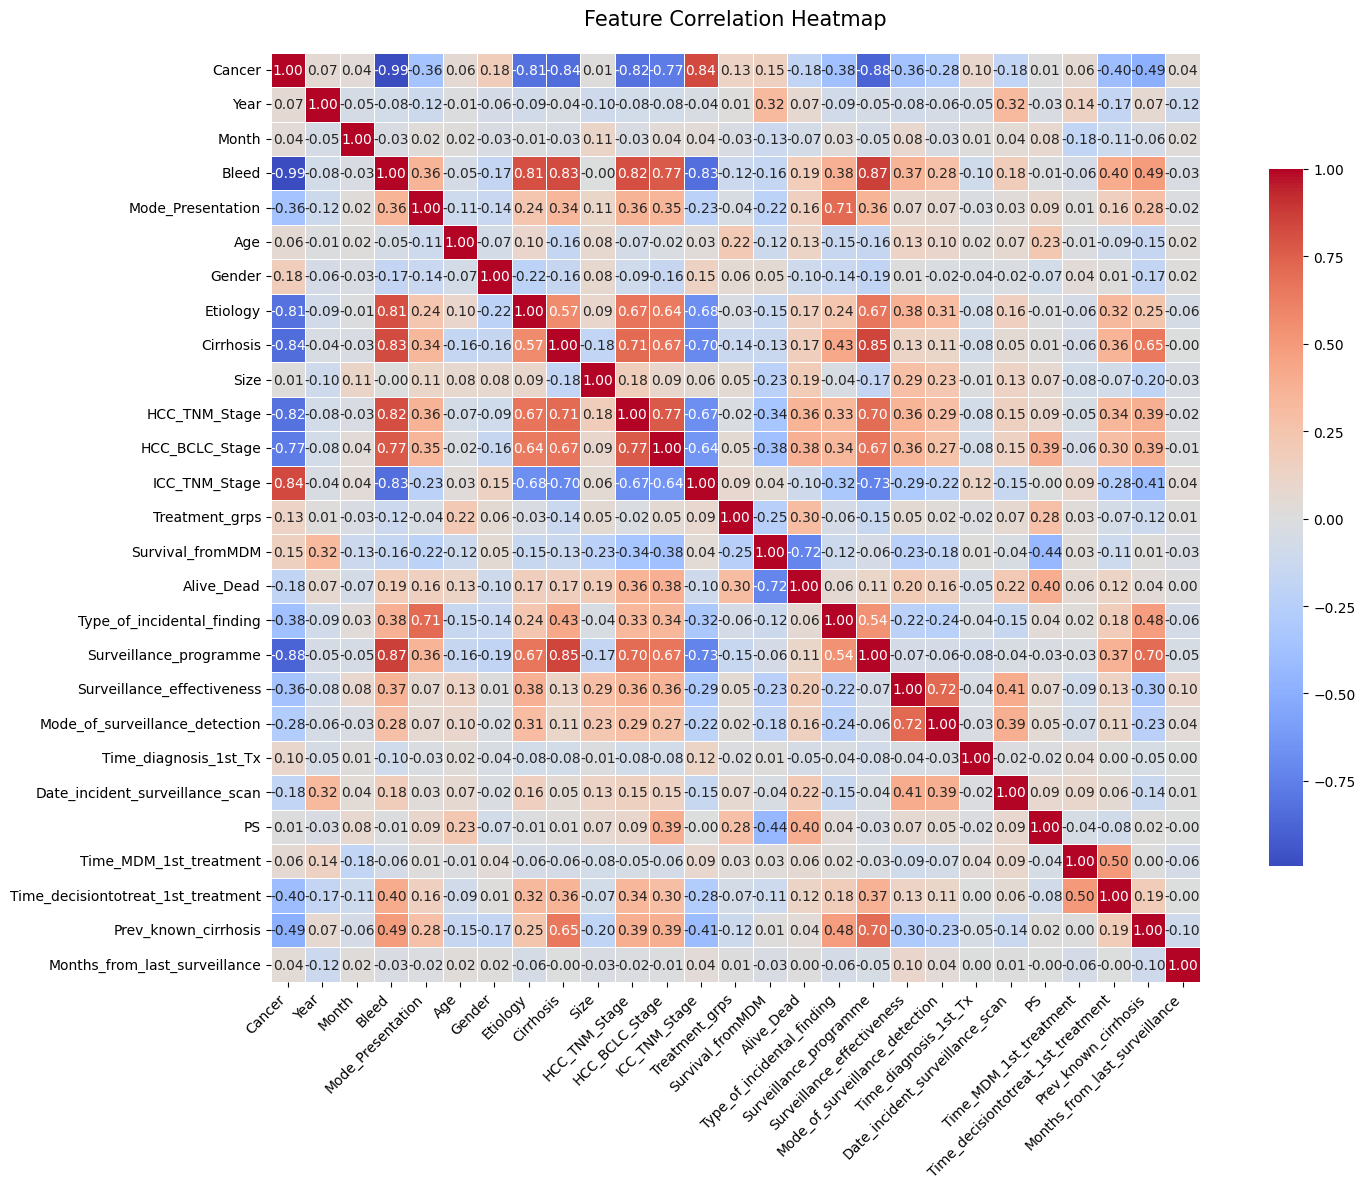

In [15]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Create a heatmap with Seaborn
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      fmt='.2f',
                      cmap='coolwarm',
                      linewidths=0.5,
                      square=True,
                      cbar_kws={"shrink": .75},
                      annot_kws={"size": 10}, # Annotation font size
                      mask=None)  # No mask, show all cells

# Improve label readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=10)

# Add a title to the heatmap
plt.title('Feature Correlation Heatmap', fontsize=15, pad=20)

# Display the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

In [16]:
# Model Training and Evaluation
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}


In [17]:
# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [18]:
# Training and evaluating models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": classification_rep,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc
    }
    print(f"{model_name}:\n")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Classification Report:\n{classification_rep}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

Logistic Regression:

Accuracy: 0.9556
ROC AUC: 0.9948
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        35
           1       0.98      0.95      0.96        55

    accuracy                           0.96        90
   macro avg       0.95      0.96      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion Matrix:
[[34  1]
 [ 3 52]]

Decision Tree:

Accuracy: 0.9556
ROC AUC: 0.9481
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.95      0.98      0.96        55

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion Matrix:
[[32  3]
 [ 1 54]]

Random Forest:

Accuracy: 0.9222
ROC AUC: 0.9829
Classification Report:
              precision    recall  f1-score   su

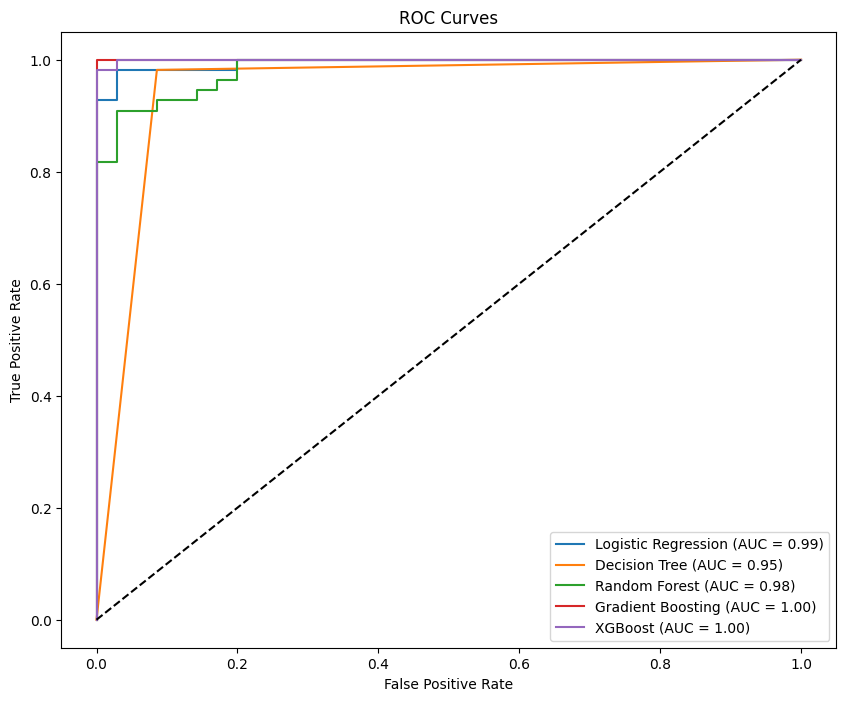

In [19]:
# Plotting ROC curves
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results[model_name]['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()


Deep Learning Model

In [20]:
# Converting target to categorical
y_train_dl = to_categorical(y_train)
y_test_dl = to_categorical(y_test)

In [21]:
# Building the neural network
dl_model = Sequential()
dl_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
dl_model.add(Dropout(0.5))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dropout(0.5))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(2, activation='softmax'))


In [22]:
# Compiling the model
dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = dl_model.fit(X_train, y_train_dl, epochs=50, batch_size=32, validation_data=(X_test, y_test_dl), verbose=2)


Epoch 1/50
12/12 - 1s - loss: 0.7393 - accuracy: 0.5167 - val_loss: 0.6034 - val_accuracy: 0.7556 - 1s/epoch - 119ms/step
Epoch 2/50
12/12 - 0s - loss: 0.6493 - accuracy: 0.6139 - val_loss: 0.5364 - val_accuracy: 0.7444 - 79ms/epoch - 7ms/step
Epoch 3/50
12/12 - 0s - loss: 0.5851 - accuracy: 0.6750 - val_loss: 0.4906 - val_accuracy: 0.8111 - 56ms/epoch - 5ms/step
Epoch 4/50
12/12 - 0s - loss: 0.5720 - accuracy: 0.7000 - val_loss: 0.4433 - val_accuracy: 0.8111 - 73ms/epoch - 6ms/step
Epoch 5/50
12/12 - 0s - loss: 0.5032 - accuracy: 0.7750 - val_loss: 0.4084 - val_accuracy: 0.8000 - 69ms/epoch - 6ms/step
Epoch 6/50
12/12 - 0s - loss: 0.4668 - accuracy: 0.7556 - val_loss: 0.3809 - val_accuracy: 0.8222 - 54ms/epoch - 4ms/step
Epoch 7/50
12/12 - 0s - loss: 0.4345 - accuracy: 0.7861 - val_loss: 0.3568 - val_accuracy: 0.8444 - 54ms/epoch - 4ms/step
Epoch 8/50
12/12 - 0s - loss: 0.4146 - accuracy: 0.8000 - val_loss: 0.3394 - val_accuracy: 0.8444 - 74ms/epoch - 6ms/step
Epoch 9/50
12/12 - 0s - 

In [23]:
# Evaluating the model
score = dl_model.evaluate(X_test, y_test_dl, verbose=0)
print(f"Deep Learning Model Accuracy: {score[1]:.4f}")


Deep Learning Model Accuracy: 0.9333


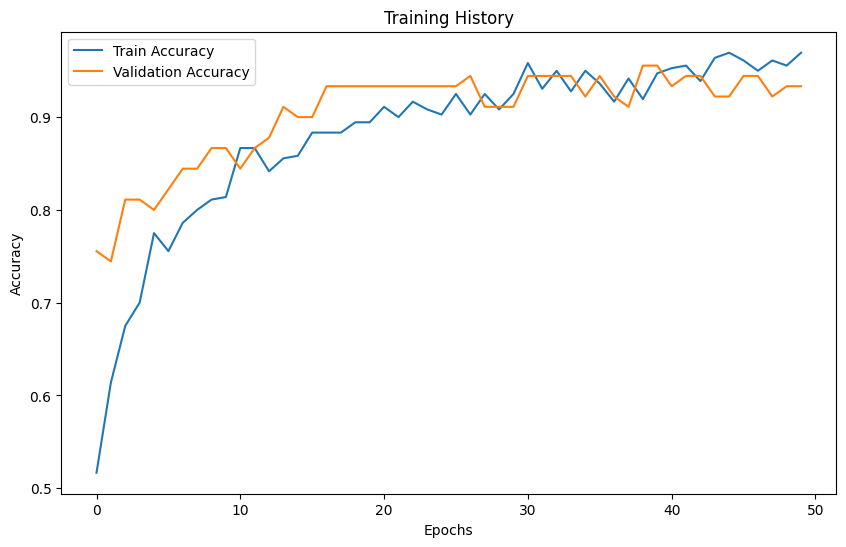

In [24]:
# Plotting training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

In [25]:
# Getting predictions from the neural network
y_pred_dl = np.argmax(dl_model.predict(X_test), axis=1)
conf_matrix_dl = confusion_matrix(y_test, y_pred_dl)
classification_rep_dl = classification_report(y_test, y_pred_dl)
roc_auc_dl = roc_auc_score(y_test, dl_model.predict(X_test)[:, 1])

3/3 [==============================] - 0s 4ms/step


In [26]:
# Printing results for the deep learning model
print(f"Deep Learning Model:\n")
print(f"Confusion Matrix:\n{conf_matrix_dl}")
print(f"Classification Report:\n{classification_rep_dl}")
print(f"ROC AUC: {roc_auc_dl:.4f}")

Deep Learning Model:

Confusion Matrix:
[[31  4]
 [ 2 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.93      0.96      0.95        55

    accuracy                           0.93        90
   macro avg       0.93      0.92      0.93        90
weighted avg       0.93      0.93      0.93        90

ROC AUC: 0.9860


3/3 [==============================] - 0s 3ms/step


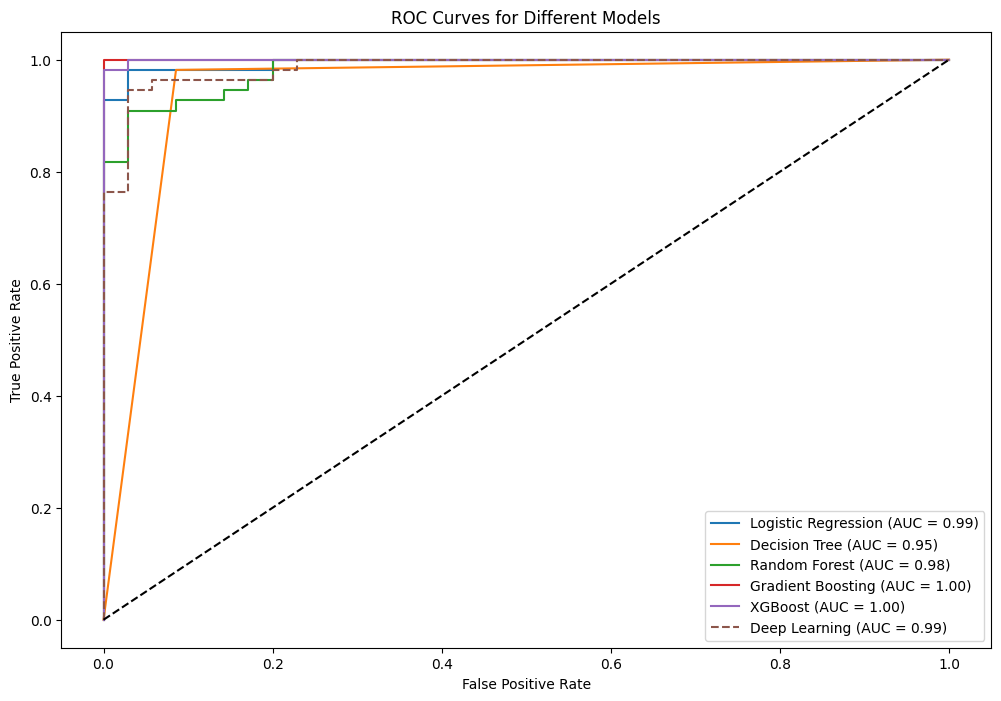

In [27]:
# Plotting ROC curves for all models
plt.figure(figsize=(12, 8))

for model_name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {results[model_name]['roc_auc']:.2f})")

# ROC for Deep Learning model
fpr_dl, tpr_dl, _ = roc_curve(y_test, dl_model.predict(X_test)[:, 1])
plt.plot(fpr_dl, tpr_dl, label=f"Deep Learning (AUC = {roc_auc_dl:.2f})", linestyle='--')

# Plotting diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='best')

# Show plot
plt.show()

In [28]:
# Comparison of all models
model_names = list(results.keys()) + ["Deep Learning"]
accuracies = [results[model]['accuracy'] for model in results] + [score[1]]
roc_aucs = [results[model]['roc_auc'] for model in results] + [roc_auc_dl]


In [29]:
comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "ROC AUC": roc_aucs
})

print(comparison_df)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.955556  0.994805
1        Decision Tree  0.955556  0.948052
2        Random Forest  0.922222  0.982857
3    Gradient Boosting  1.000000  1.000000
4              XGBoost  0.988889  0.999481
5        Deep Learning  0.933333  0.985974


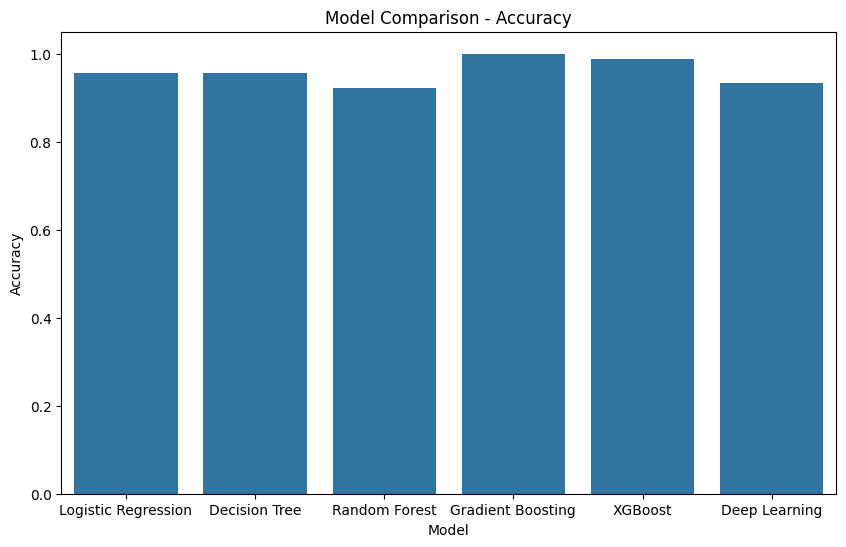

In [30]:
# Plotting model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title('Model Comparison - Accuracy')
plt.show()

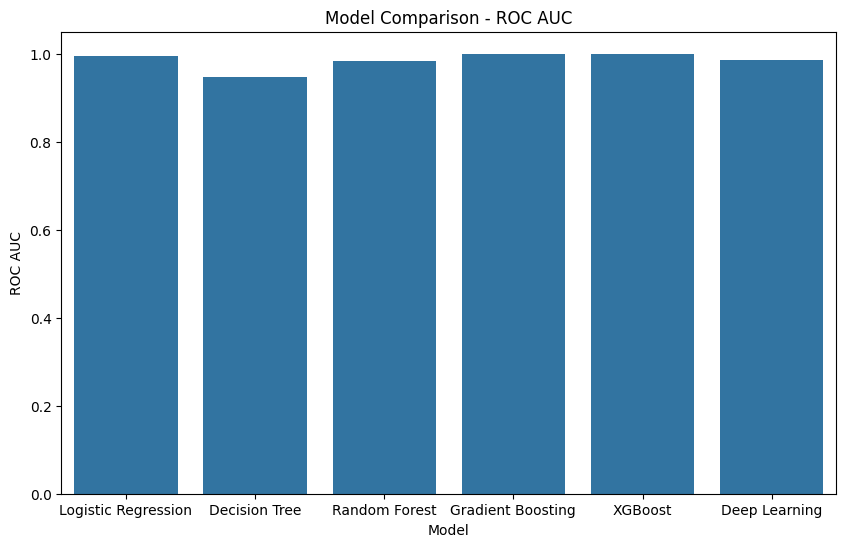

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="ROC AUC", data=comparison_df)
plt.title('Model Comparison - ROC AUC')
plt.show()

In [32]:
# Function to compute Sensitivity and Specificity
def compute_sensitivity_specificity(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    return sensitivity, specificity

# Add Sensitivity and Specificity to results for all models
for model_name in results.keys():
    conf_matrix = results[model_name]['confusion_matrix']
    sensitivity, specificity = compute_sensitivity_specificity(conf_matrix)
    results[model_name]['sensitivity'] = sensitivity
    results[model_name]['specificity'] = specificity

In [33]:
# Calculate Sensitivity and Specificity for the Deep Learning model
sensitivity_dl, specificity_dl = compute_sensitivity_specificity(conf_matrix_dl)

# Update the comparison DataFrame with sensitivity and specificity
model_names = list(results.keys()) + ["Deep Learning"]
accuracies = [results[model]['accuracy'] for model in results] + [score[1]]
sensitivities = [results[model]['sensitivity'] for model in results] + [sensitivity_dl]
specificities = [results[model]['specificity'] for model in results] + [specificity_dl]


In [34]:
comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Sensitivity": sensitivities,
    "Specificity": specificities
})

print(comparison_df)

# Reshape the Data for plotting
metrics_df = pd.melt(comparison_df, id_vars=["Model"],
                     value_vars=["Accuracy", "Sensitivity", "Specificity"],
                     var_name="Metric", value_name="Score")


                 Model  Accuracy  Sensitivity  Specificity
0  Logistic Regression  0.955556     0.945455     0.971429
1        Decision Tree  0.955556     0.981818     0.914286
2        Random Forest  0.922222     0.927273     0.914286
3    Gradient Boosting  1.000000     1.000000     1.000000
4              XGBoost  0.988889     1.000000     0.971429
5        Deep Learning  0.933333     0.963636     0.885714


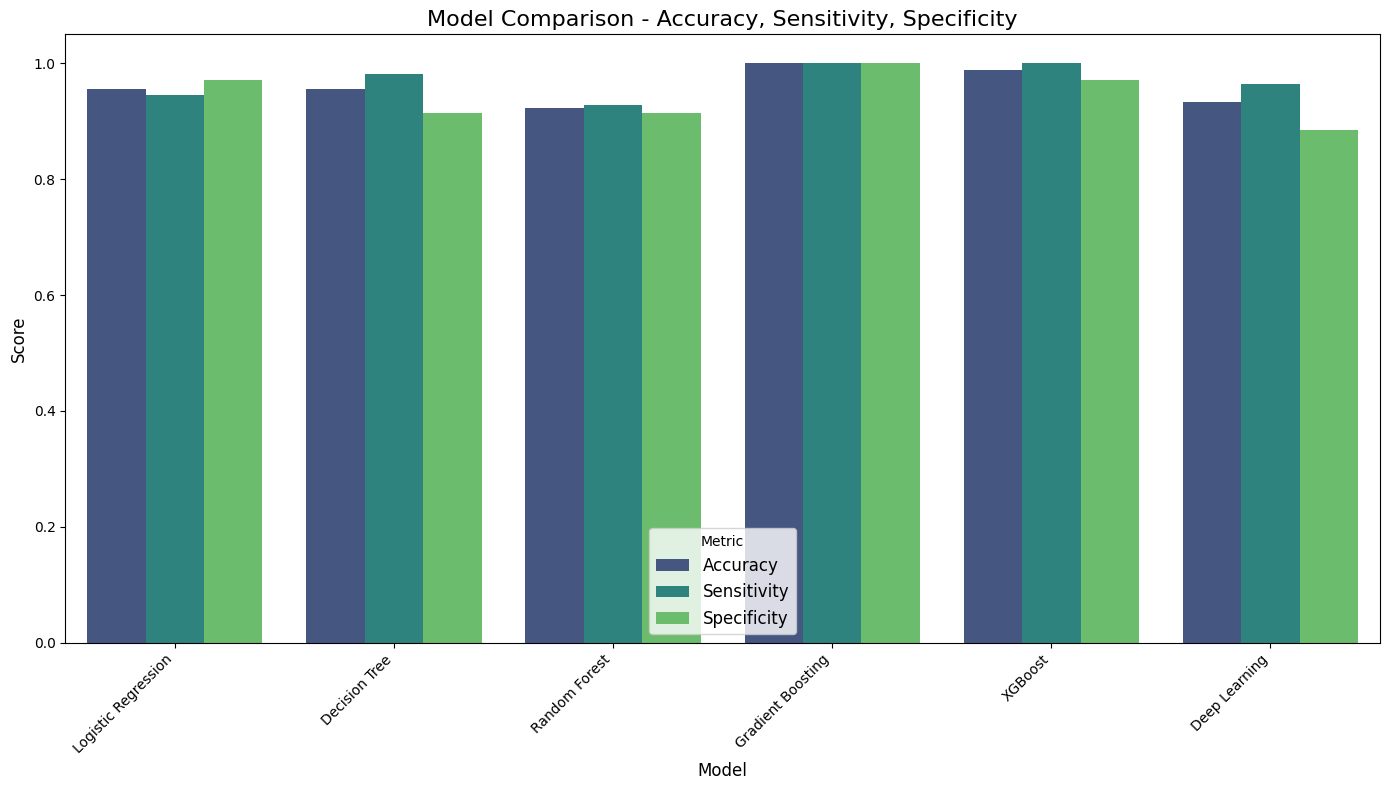

In [35]:
# Plot the Data
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_df, palette="viridis")

# Adding titles and labels
plt.title('Model Comparison - Accuracy, Sensitivity, Specificity', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
# Finding the best model based on ROC AUC
best_model_name = comparison_df['Model'][comparison_df['Accuracy'].idxmax()] # Get the model name corresponding to the maximum ROC AUC
best_model = models[best_model_name] if best_model_name != "Deep Learning" else dl_model

print(f"The best model is: {best_model_name} with Accuracy: {comparison_df.loc[comparison_df['Model'] == best_model_name, 'Accuracy'].values[0]:.4f}")

The best model is: Gradient Boosting with Accuracy: 1.0000


In [37]:
import numpy as np
import pandas as pd

# Sample new patient data
# Make sure the length matches the number of features used in the model (excluding the target variable)
new_patient_data = [1, 1, 1, 2, 3, 4, 1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]

# Convert the new patient data to a DataFrame
# Note: The DataFrame should have the same number of columns as the training data
# Replace 'Feature1', 'Feature2', ..., 'FeatureN' with actual feature names from your dataset
new_patient_df = pd.DataFrame([new_patient_data], columns=X.columns)

# Scale the features
new_patient_scaled = scaler.transform(new_patient_df)

# Predict using the best model
if best_model_name != "Deep Learning":
    prediction = best_model.predict(new_patient_scaled)
else:
    prediction = np.argmax(dl_model.predict(new_patient_scaled), axis=1)

# Output the prediction
alive_dead = "Alive" if prediction == 1 else "Dead"
print(f"The predicted status for the new patient is: {alive_dead}")


The predicted status for the new patient is: Alive


In [38]:
import pickle

# Assuming `best_model` is your trained model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
# Assuming `scaler` is your trained scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
